In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

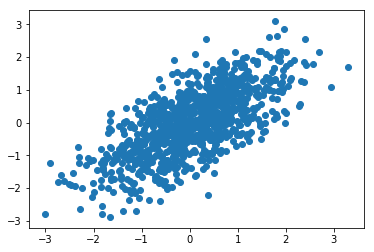

In [2]:
#generate random numbers
m=[0,0]
s=[[1,0.7],[0.7,1]]
r=np.random.multivariate_normal(m,s,1000)
plt.scatter(r[:,0],r[:,1])

[-0.70012754 -0.71401781]


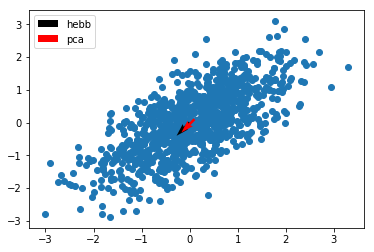

In [13]:
#pca
pca=PCA()
pca.fit(r)
v_pca=pca.components_
print v_pca[0]

#hebb
tau=1.0
alpha=0.1
u=r
w=np.random.randn(2)
for k in range(1000):
    dt=0.01
    v=np.dot(u,w)
    dwdt=np.dot(v,u)/len(v)/tau
    w=w+dwdt*dt

#plot
plt.scatter(u[:,0],u[:,1])
plt.quiver(0,0,w[0],w[1],label='hebb')
plt.quiver(0.1,0.1,v_pca[0,0],v_pca[0,1],color='red',label='pca')
plt.legend()

In [14]:
def ang(a,b):
    inter=np.sum(a*b)/np.sqrt(np.sum(a**2))/np.sqrt(np.sum(b**2))
    return np.arccos(inter)

In [15]:
print ('angle between first  PC and w : {}'.format(ang(w,v_pca[0,:])))
print ('angle between second PC and w : {}'.format(ang(w,v_pca[1,:])))

angle between first  PC and w : 0.00074080390073
angle between second PC and w : 1.5715371307


In [27]:
#elastic net

In [92]:
def compv(w,u):
    #compute "v" from "w","u"
    temp=np.sum((w-u)**2,axis=2)
    temp=np.exp(temp/(2.0*sigb**2))
    z=temp/np.sum(temp)
    v=z
    return v

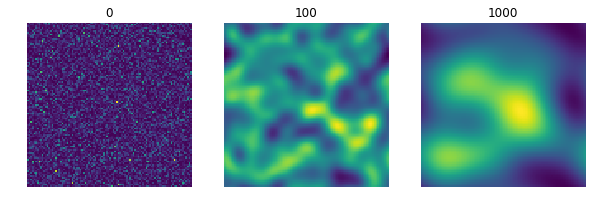

In [122]:
#elastic net

nu=2 #dimensions of u
nvh=100 #height of W
nvw=100 #width of W

sigb=5
dt=0.01
beta=10.0
tau=1.0

w=np.random.randn(nvh,nvw,nu)

#simulate for 1000 steps
for _ in range(1000):
    u=np.random.randn(nu)
    v=compv(w,u)

    if _==0:
        v_0=v.copy()
    if _==100:
        v_100=v.copy()

    v_repmat=np.repeat(v.reshape(nvh,nvw,1),nu,axis=2)
    # for calculation of adjacent w
    w1=np.concatenate([w[-1:,:],w[:-1]],axis=0)
    w2=np.concatenate([w[1:,:],w[0:1,:]],axis=0)
    w3=np.concatenate([w[:,-1:],w[:,:-1]],axis=1)
    w4=np.concatenate([w[:,1:],w[:,0:1]],axis=1)

    dwdt=v_repmat*(u-w) + beta*(w1-w + w2-w + w3-w + w4-w)
    w=w+dwdt*dt/tau

# plot
plt.figure(figsize=[10,10])
plt.subplot(1,3,1)
plt.imshow(v_0)
plt.axis('off')
plt.title('0')
plt.subplot(1,3,2)
plt.imshow(v_100)
plt.axis('off')
plt.title('100')
plt.subplot(1,3,3)
plt.imshow(v)
plt.axis('off')
plt.title('1000')

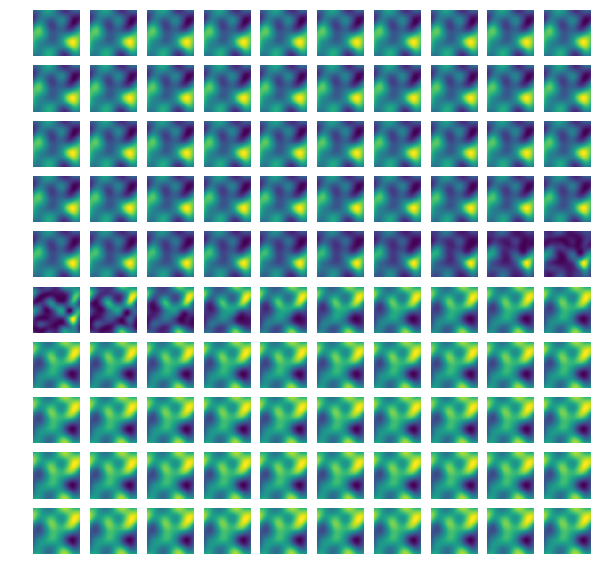

In [123]:
st=-0.5
en=-st
n=100

u_list=np.concatenate([np.linspace(st,en,n).reshape(-1,1),np.zeros([n,nu-1])],axis=1)
v_list=[compv(w,u) for u in u_list]

plt.figure(figsize=[10,10])
for k in range(100):
    plt.subplot(10,10,k+1)
    plt.imshow(v_list[k])
    plt.axis('off')

(-0.5, 99.5, 99.5, -0.5)

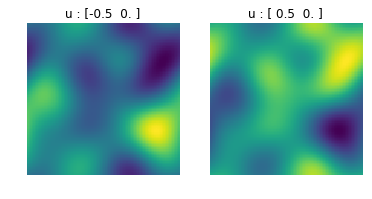

In [124]:
#omake
#extra

#first and last

plt.subplot(1,2,1)
u=np.zeros(nu)
u[0]=st
v=compv(w,u)
plt.imshow(v)
plt.title('u : {}'.format(u))
plt.axis('off')

plt.subplot(1,2,2)
u=np.zeros(nu)
u[0]=en
v=compv(w,u)
plt.imshow(v)
plt.title('u : {}'.format(u))
plt.axis('off')

(-0.5, 99.5, 99.5, -0.5)

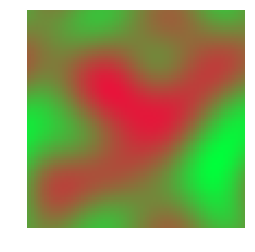

In [125]:
#omake
#extra

#representation by color

res=np.zeros([100,100,3])
for k in range(nu):
    u=-1*np.ones(nu)
    u[k]=1
    v=compv(w,u)
    res[:,:,k]=v
    if k==2:
        break

im=(res-res[res>0].min())
im=im/im.max()

plt.imshow(im)
plt.axis('off')

(-0.5, 99.5, 99.5, -0.5)

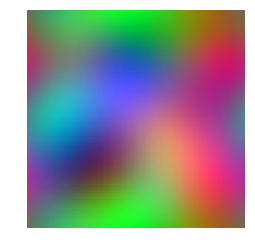

In [129]:
#elastic net
#nu=2 → nu=3

nu=3 #dimensions of u ##################
nvh=100 #height of W
nvw=100 #width of W

sigb=5
dt=0.01
beta=10.0
tau=1.0

w=np.random.randn(nvh,nvw,nu)

#simulate for 1000 steps
for _ in range(1000):
    u=np.random.randn(nu)
    v=compv(w,u)

    if _==0:
        v_0=v.copy()
    if _==100:
        v_100=v.copy()

    v_repmat=np.repeat(v.reshape(nvh,nvw,1),nu,axis=2)
    # for calculation of adjacent w
    w1=np.concatenate([w[-1:,:],w[:-1]],axis=0)
    w2=np.concatenate([w[1:,:],w[0:1,:]],axis=0)
    w3=np.concatenate([w[:,-1:],w[:,:-1]],axis=1)
    w4=np.concatenate([w[:,1:],w[:,0:1]],axis=1)

    dwdt=v_repmat*(u-w) + beta*(w1-w + w2-w + w3-w + w4-w)
    w=w+dwdt*dt/tau


#omake
#extra

#representation by color

res=np.zeros([100,100,3])
for k in range(nu):
    u=-1*np.ones(nu)
    u[k]=1
    v=compv(w,u)
    res[:,:,k]=v
    if k==2:
        break

im=(res-res[res>0].min())
im=im/im.max()

plt.imshow(im)
plt.axis('off')